# Clustering

Dans cet essai qui constitue le baseline des clusters pour le jeu de données, 

- Toutes les variables disponibles sont utilisées
- L'algorithme du k-means est utilisé (même si les variables ne sont pas tout à fait adéquates pour ce genre de méthode étant donné qu'elles sont binaires et ordinales plutôt que continues)

À la fin de cette étape, nous aurons : 

- Les valeurs des moyennes et ecart-type pour le scaling des variables (`03_pilot1_scale_origins.rds` et `03_pilot1_scale_ecarts_types.rds`)
- Le modèle de k-means (`03_pilot1_kmeans.rds`)
- Le fichier de données original augmenté des variables de cluster (`03_pilot1_2022.rds`)
- Un fichier csv (pour ouverture dans excel par exemple) qui contient la moyenne par cluster par variable afin de déterminer "à la main" quels sont les éléments distinctifs de chaque cluster (`03_pilot1_clusters_desc.csv`)

In [5]:
library(dplyr)
library(factoextra)

df_pilot1_2022 <- readRDS(file = "../../_PrivateFolder_datagotchi_federal_2025/data/clustering/qc2022/02_pilot1_2022.rds")

In [6]:
# Sélection des variables pour le clustering
source("03-0_variables.R")
df_pilot1_2022_clust <- df_pilot1_2022 %>% select(all_of(variables_clust)) %>% select(-id)

In [7]:
# Scaling des variables
df_scaled <- scale(df_pilot1_2022_clust)

# Récupérer les moyennes et écarts-types
origines <- attr(df_scaled, "scaled:center")  # Moyennes utilisées pour centrer
ecarts_types <- attr(df_scaled, "scaled:scale")  # Écarts-types utilisés pour réduire

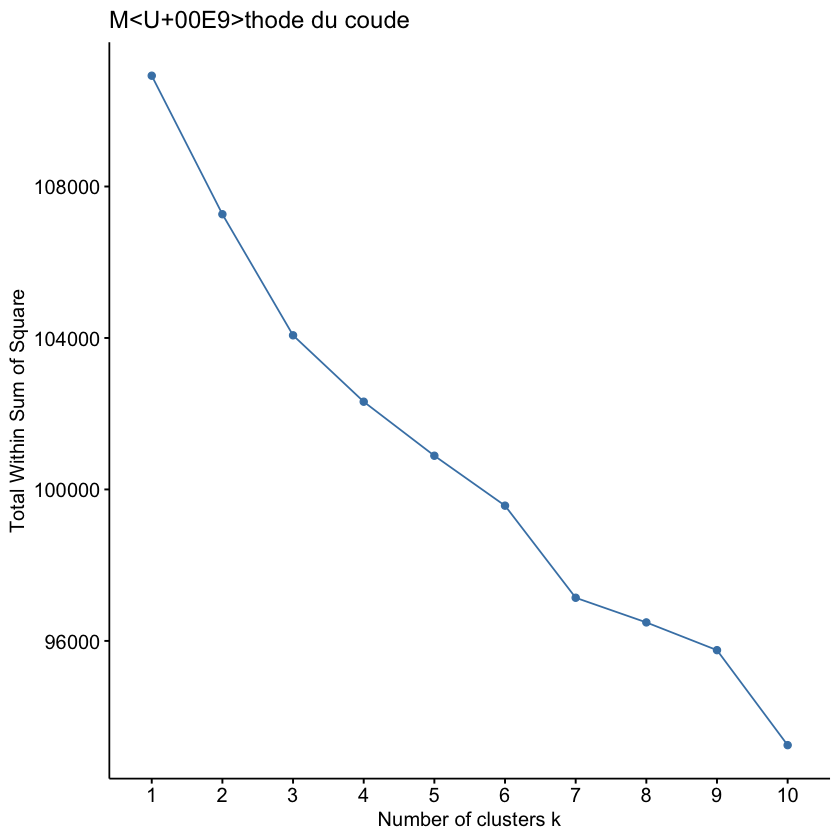

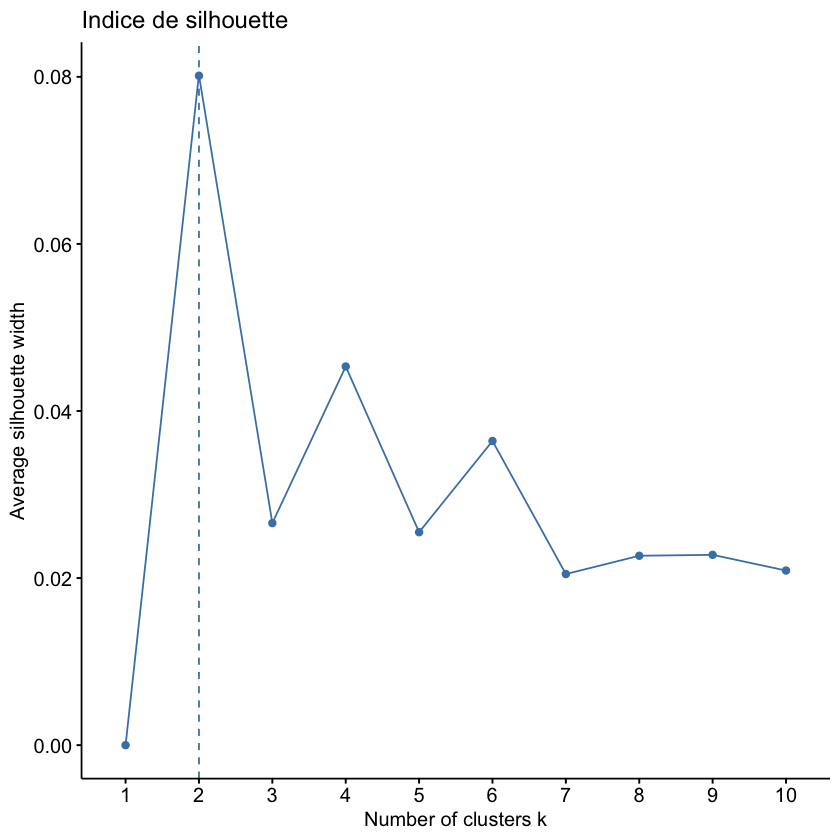

In [8]:
# Détermination du nombre optimal de clusters
# Méthode de l’élbow (coude) et l’indice de silhouette.

# Méthode du coude
fviz_nbclust(df_scaled, kmeans, method = "wss") +
  ggtitle("Méthode du coude")

# Indice de silhouette
fviz_nbclust(df_scaled, kmeans, method = "silhouette") +
  ggtitle("Indice de silhouette")

In [9]:
# Application de K-Means Clustering

# Choisissez un nombre de clusters approprié (par exemple, 3).
k <- 6

# K-Means Clustering
set.seed(123)  # Pour la reproductibilité
kmeans_result <- kmeans(df_scaled, centers = k, nstart = 25)

In [10]:
kmeans_result

K-means clustering with 6 clusters of sizes 115, 137, 524, 449, 233, 42

Cluster means:
       act_Gym     act_Walk     act_Run    act_Yoga   act_Other    act_None
1  0.076687640  0.094546873  0.28982453  0.08437795 -0.14089693 -0.21194003
2  0.067086310 -0.010221983  0.01470543  0.11632284 -0.01958606  0.13035345
3 -0.013977453  0.001910089 -0.03660476  0.08771875 -0.12479860  0.01382365
4 -0.004421562 -0.111152484  0.04102361 -0.17606467  0.10114952  0.07827925
5 -0.069318342  0.165435938 -0.16623670 -0.02381239  0.12577629 -0.10450783
6  0.177398507  0.021131582  0.09880906  0.30945251  0.22759269 -0.27442791
  act_Fishing act_Hunting act_VisitsMuseumsGaleries
1 -0.01465161  0.03555491                0.25421999
2 -0.19728260 -0.17048255                0.28232166
3 -0.06820786 -0.08778603               -0.04564659
4  0.22029629  0.23595017               -0.18321590
5 -0.16847177 -0.19900192                0.07848433
6  0.11415377  0.13554758                0.47577460
  act_MotorizedO

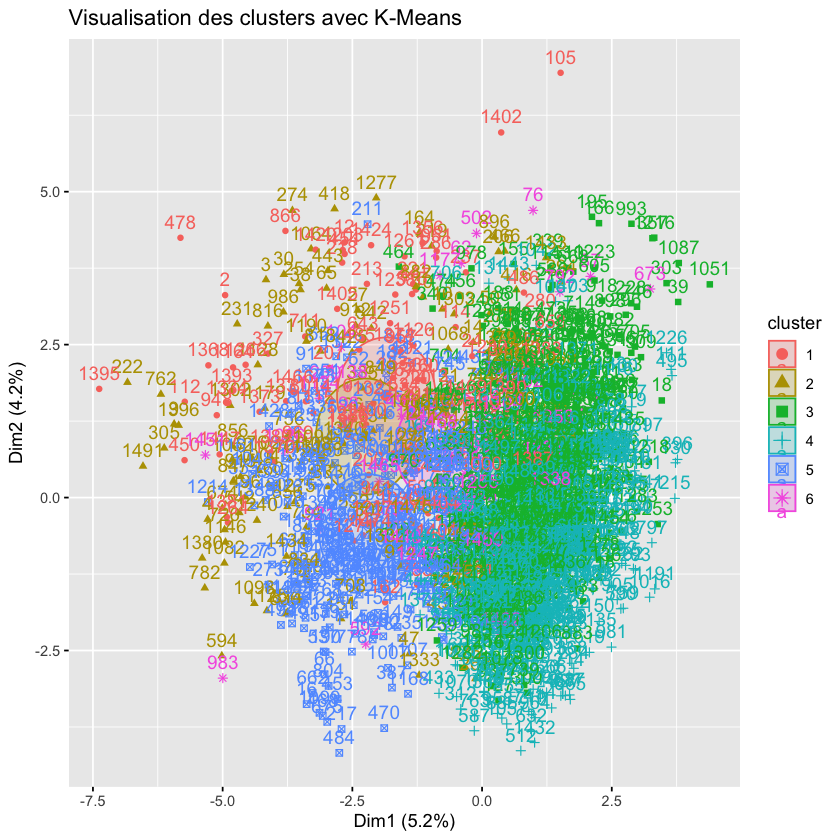

In [11]:
# Visualisation des clusters

# Visualisation des clusters dans l’espace des deux premières dimensions :

# Utilisation de factoextra pour représenter les clusters
fviz_cluster(kmeans_result, data = df_scaled, ellipse.type = "euclid") +
  ggtitle("Visualisation des clusters avec K-Means")

In [12]:
library(dplyr)
library(tidyr)

# Ajouter les clusters au dataframe original
df_pilot1_2022$cluster <- as.factor(kmeans_result$cluster)

# Préparer les données pour pouvoir donner des noms aux clusters
df_pilot1_2022 <- df_pilot1_2022 %>%
  mutate(cluster_name = as.character(cluster))

# Créer des variables dummy
# Liste des clusters
clusters_uniques <- unique(df_pilot1_2022$cluster)
# Création des variables
for (i in clusters_uniques) {
  df_pilot1_2022[[paste0("cluster_", i)]] <- ifelse(df_pilot1_2022$cluster == i, 1, 0)
}

In [13]:
# Sauvegarder les résultats du clustering
saveRDS(origines, file="../../_PrivateFolder_datagotchi_federal_2025/data/clustering/qc2022/03_pilot1_scale_origins.rds")
saveRDS(ecarts_types, file="../../_PrivateFolder_datagotchi_federal_2025/data/clustering/qc2022/03_pilot1_scale_ecarts_types.rds")
saveRDS(kmeans_result, file = "../../_PrivateFolder_datagotchi_federal_2025/data/clustering/qc2022/03_pilot1_kmeans.rds")
saveRDS(df_pilot1_2022, file = "../../_PrivateFolder_datagotchi_federal_2025/data/clustering/qc2022/03_pilot1_2022.rds")